In [1]:
import snowflake.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
conn = snowflake.connector.connect(
    user='YASSIN',
    password='Swedenystad+1',
    account ="HDSCWGU-RH60445",
    database="SPOTIFY_BRIEF",
    schema="SPOTIFY_BRIEF_SCHEMA"
)
cur = conn.cursor()
cur.execute('select * from "spotify_fact"')
df = cur.fetch_pandas_all()
conn.close()

In [9]:
top_artists = df.groupby('track_artist')['track_popularity'].mean().sort_values(ascending=False).head(5)
print(top_artists)


track_artist
Trevor Daniel    97.000000
Y2K              91.000000
Don Toliver      90.714286
Roddy Ricch      88.210526
DaBaby           87.857143
Name: track_popularity, dtype: float64


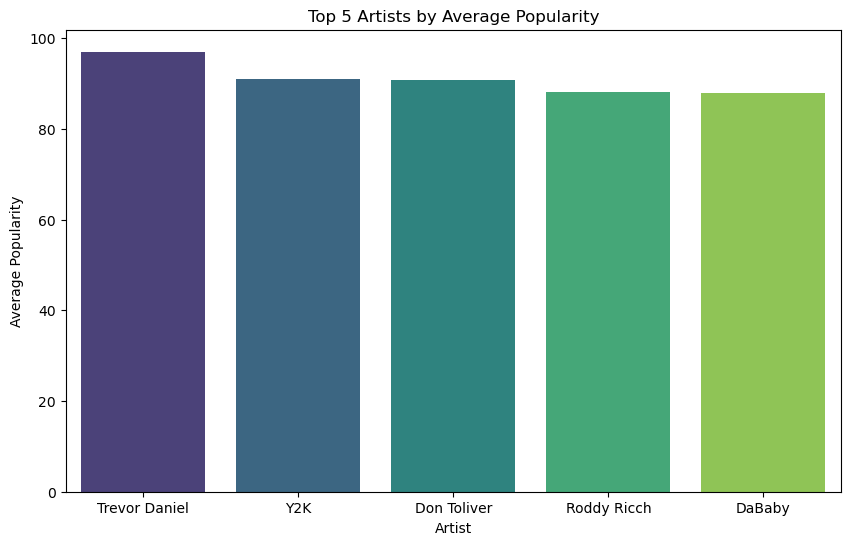

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.index, y=top_artists.values, palette='viridis', orient='v')
plt.title('Top 5 Artists by Average Popularity')
plt.xlabel('Artist')
plt.ylabel('Average Popularity')
plt.show()

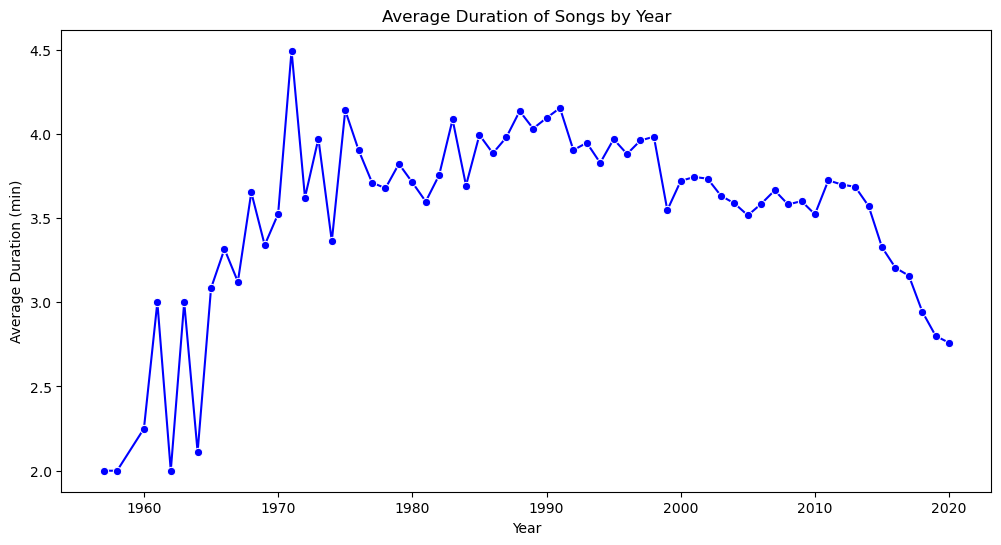

In [23]:


# Try to convert to datetime, if not possible, fill with NaN

# Extract the year from the release date


# Plot average duration by year
average_duration_by_year = df.groupby('release_year')['duration_min'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=average_duration_by_year.index, y=average_duration_by_year.values, marker='o', color='blue')
plt.title('Average Duration of Songs by Year')
plt.xlabel('Year')
plt.ylabel('Average Duration (min)')
plt.show()

/var/folders/qn/xn_qh6qs56g4kyg5vcjpns8r0000gn/T/ipykernel_20499/645060526.py:20: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, label='Popularity')


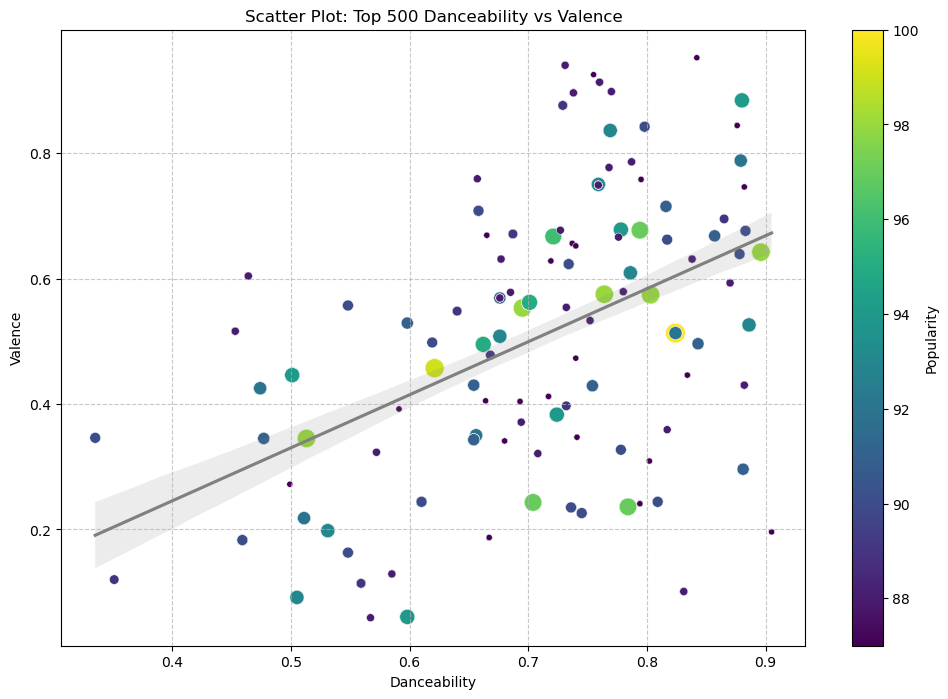

In [29]:
from matplotlib.cm import ScalarMappable
# Assuming df is your DataFrame
top_500_tracks = df.nlargest(500, 'track_popularity')

plt.figure(figsize=(12, 8))

# Use a color gradient based on popularity
scatter_plot = sns.scatterplot(x='danceability', y='valence', data=top_500_tracks, hue='track_popularity', palette='viridis', size='track_popularity', sizes=(20, 200), legend=False)

# Add a regression line
sns.regplot(x='danceability', y='valence', data=top_500_tracks, scatter=False, ax=scatter_plot, color='gray')

plt.title('Scatter Plot: Top 500 Danceability vs Valence')
plt.xlabel('Danceability')
plt.ylabel('Valence')

# Create a separate colorbar
sm = ScalarMappable(cmap='viridis')
sm.set_array(top_500_tracks['track_popularity'])
cbar = plt.colorbar(sm, label='Popularity')

# Show grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

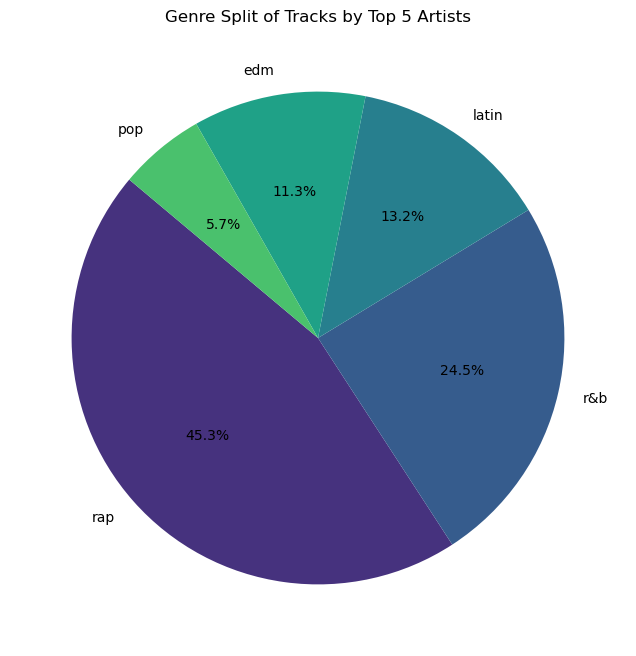

In [19]:
top_artists = df.groupby('track_artist')['track_popularity'].mean().nlargest(5).index

# Filter the DataFrame for tracks by the top 5 artists
top_tracks = df[df['track_artist'].isin(top_artists)]
# Get the count of tracks in each genre
genre_counts = top_tracks['playlist_genre'].value_counts()

# Plot a pie chart
plt.figure(figsize=(10, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Genre Split of Tracks by Top 5 Artists')
plt.show()